## LSTM (Long short term memory)
- RNN 계열의 모델인 LSTM을 통해 모델링을 진행합니다.

### 1) 연령, 성별 카테고리별 총 판매량 예측
- output node를 10개로 설정하여, 한 모델을 통해 전 연령/성별에 대한 판매량을 학습 및 예측합니다.

In [ ]:
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, GRU
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.metrics import mean_squared_error

#### (1) 데이터 전처리

In [ ]:
# 상품 목록을 정의합니다. 
goods = wea_sale_ohe.loc[:,'소분류_가열식 가습기':'소분류_히터'].columns.tolist()

# 상품 및 날짜로 데이터를 정렬합니다.
wea_sale_ohe.sort_values(goods+['날짜'], inplace=True)

# 정렬로 뒤죽박죽이 된 행 인덱스를 초기화합니다. 
wea_sale_ohe.index = range(0, len(wea_sale_ohe))

# 모델의 성능 향상을 위해 MinMaxScale을 진행합니다.

weather_sc = MinMaxScaler(feature_range = (0, 1)) 
weather_scaled = weather_sc.fit_transform(wea_sale_ohe.loc[:,'평균기온(°C)':'미세먼지(PM10)'].values)

# 반드시 판매량 데이터를 마지막 열에 두어야 합니다.
# scale된 데이터를 병합해서 total data를 생성합니다.
# 상품 소분류 원핫인코딩 열은 MinMaxScale을 진행하지 않았습니다. (0과 1로 이루어졌으므로)
total = np.hstack([wea_sale_ohe.loc[:,'소분류_가열식 가습기':'소분류_히터'].values,
                   weather_scaled,
                   wea_sale_ohe.loc[:,'20대 여성 판매량(개)':'60대 남성 판매량(개)'].values])

# 가열식 가습기 판매 데이터 개수의 80% 입니다.
index =int(len(wea_sale_ohe[wea_sale_ohe['소분류_가열식 가습기']==1]) * 0.8)

# 가스온수기 판매 데이터의 80%를 train data로, 20%를 test data로 정의합니다.
train = total[wea_sale_ohe['소분류_가열식 가습기']==1][:index]
test = total[wea_sale_ohe['소분류_가열식 가습기']==1][index:]

# 전체 상품 목록 리스트
goods = wea_sale_ohe.loc[:,'소분류_가열식 가습기':'소분류_히터'].columns.tolist()

# 각 상품의 판매 데이터의 80%는 train, 20%는 test data에 추가합니다. 
for good in goods[1:]:
  index =int(len(wea_sale_ohe[wea_sale_ohe[good]==1]) * 0.8)
  train = np.vstack([train, total[wea_sale_ohe[good]==1][:index]])
  test = np.vstack([test, total[wea_sale_ohe[good]==1][index:]])

# test 데이터도 위와 같이 생성합니다.

X_test = []
y_test = []

day = 20

for good_index in range(0, 126):
  df = test[test[:, good_index]==1]
  for i in range(day, df.shape[0]+1):
      X_test.append(df[i-day:i, :-10])
      y_test.append(df[i-1, -10:])

X_test, y_test = np.array(X_test), np.array(y_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], -1))

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = '../data/'
# path = '/content/drive/MyDrive/final weather/data/'

wea_sale_ohe = pd.read_csv(path+ 'weather_sale_ohe.csv')

In [ ]:
# 상품 목록을 정의합니다. 
goods = wea_sale_ohe.loc[:,'소분류_가열식 가습기':'소분류_히터'].columns.tolist()

In [ ]:
# 상품 및 날짜로 데이터를 정렬합니다.
wea_sale_ohe.sort_values(goods+['날짜'], inplace=True)

In [ ]:
# 정렬로 뒤죽박죽이 된 행 인덱스를 초기화합니다. 
wea_sale_ohe.index = range(0, len(wea_sale_ohe))

In [ ]:
# 모델의 성능 향상을 위해 MinMaxScale을 진행합니다.

weather_sc = MinMaxScaler(feature_range = (0, 1)) 
weather_scaled = weather_sc.fit_transform(wea_sale_ohe.loc[:,'평균기온(°C)':'미세먼지(PM10)'].values)

# 반드시 판매량 데이터를 마지막 열에 두어야 합니다.
# scale된 데이터를 병합해서 total data를 생성합니다.
# 상품 소분류 원핫인코딩 열은 MinMaxScale을 진행하지 않았습니다. (0과 1로 이루어졌으므로)
total = np.hstack([wea_sale_ohe.loc[:,'소분류_가열식 가습기':'소분류_히터'].values,
                   weather_scaled,
                   wea_sale_ohe.loc[:,'20대 여성 판매량(개)':'60대 남성 판매량(개)'].values])

In [ ]:
# 가열식 가습기 판매 데이터 개수의 80% 입니다.
index =int(len(wea_sale_ohe[wea_sale_ohe['소분류_가열식 가습기']==1]) * 0.8)

# 가스온수기 판매 데이터의 80%를 train data로, 20%를 test data로 정의합니다.
train = total[wea_sale_ohe['소분류_가열식 가습기']==1][:index]
test = total[wea_sale_ohe['소분류_가열식 가습기']==1][index:]

# 전체 상품 목록 리스트
goods = wea_sale_ohe.loc[:,'소분류_가열식 가습기':'소분류_히터'].columns.tolist()

# 각 상품의 판매 데이터의 80%는 train, 20%는 test data에 추가합니다. 
for good in goods[1:]:
  index =int(len(wea_sale_ohe[wea_sale_ohe[good]==1]) * 0.8)
  train = np.vstack([train, total[wea_sale_ohe[good]==1][:index]])
  test = np.vstack([test, total[wea_sale_ohe[good]==1][index:]])

In [ ]:
X_train = [] 
y_train = []

day = 20

# good_index는 상품의 인덱스를 의미합니다.
# 총 '126'개의 상품이 있습니다. 
for good_index in range(0, 126): 

  # 해당 인덱스의 상품에 대한 판매 데이터만 추출합니다.
  df = train[train[:, good_index]==1] 

  # 해당 판매 데이터를 day 기준으로 분할합니다.(20일)
  for i in range(day, df.shape[0]+1):
      X_train.append(df[i-day:i, :-10])
      y_train.append(df[i-1, -10:])

# numpy 배열로 변환합니다.
X_train, y_train = np.array(X_train), np.array(y_train)

# X_train의 shape을 재정의합니다. 
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], -1))

In [ ]:
# test 데이터도 위와 같이 생성합니다.

X_test = []
y_test = []

day = 20

for good_index in range(0, 126):
  df = test[test[:, good_index]==1]
  for i in range(day, df.shape[0]+1):
      X_test.append(df[i-day:i, :-10])
      y_test.append(df[i-1, -10:])

X_test, y_test = np.array(X_test), np.array(y_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], -1))

#### (2) 학습 및 예측

In [ ]:
with tf.device('/device:GPU:0'):

  regressor = Sequential()

  # 모델 정의
  regressor.add(LSTM(units = 100, return_sequences = True, 
                    input_shape = (X_train.shape[1], X_train.shape[2]))) 
  regressor.add(Dropout(0.4, seed = 1))
  regressor.add(LSTM(units = 100, return_sequences = True)) 
  regressor.add(Dropout(0.4, seed = 2))
  regressor.add(LSTM(units = 100, return_sequences = True))
  regressor.add(Dropout(0.4, seed = 3))
  regressor.add(LSTM(units = 100, return_sequences = True))
  regressor.add(Dropout(0.4, seed = 4))
  regressor.add(LSTM(units = 100))
  regressor.add(Dropout(0.4, seed = 5))
  regressor.add(Dense(units = 10))

  # 모델 compile
  regressor.compile(optimizer = 'adam', loss = 'mean_squared_error') 

  # 모델 fitting
  regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

  # test data를 통한 예측
  pre_sale_total = regressor.predict(X_test) 

Epoch 1/100
2174/2174 [==============================] - 36s 11ms/step - loss: 2156.9358
Epoch 2/100
2174/2174 [==============================] - 25s 11ms/step - loss: 2128.9314
Epoch 3/100
2174/2174 [==============================] - 26s 12ms/step - loss: 2125.5979
Epoch 4/100
2174/2174 [==============================] - 24s 11ms/step - loss: 1550.5819
Epoch 5/100
2174/2174 [==============================] - 26s 12ms/step - loss: 1115.5630
Epoch 6/100
2174/2174 [==============================] - 25s 11ms/step - loss: 1033.1034
Epoch 7/100
2174/2174 [==============================] - 24s 11ms/step - loss: 1013.0051
Epoch 8/100
2174/2174 [==============================] - 26s 12ms/step - loss: 967.9310
Epoch 9/100
2174/2174 [==============================] - 26s 12ms/step - loss: 971.0134
Epoch 10/100
2174/2174 [==============================] - 25s 11ms/step - loss: 811.2267
Epoch 11/100
2174/2174 [==============================] - 24s 11ms/step - loss: 710.7708
Epoch 12/100
2174/2174 

In [ ]:
regressor.save('/content/drive/MyDrive/final weather/data/lstm_sale_80%.h5')

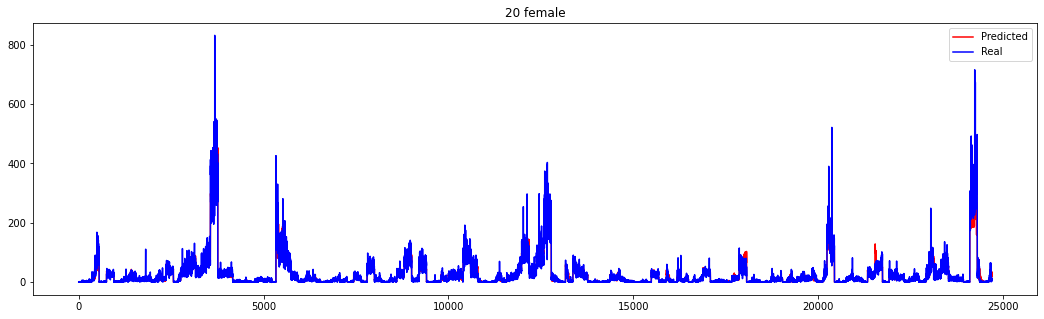

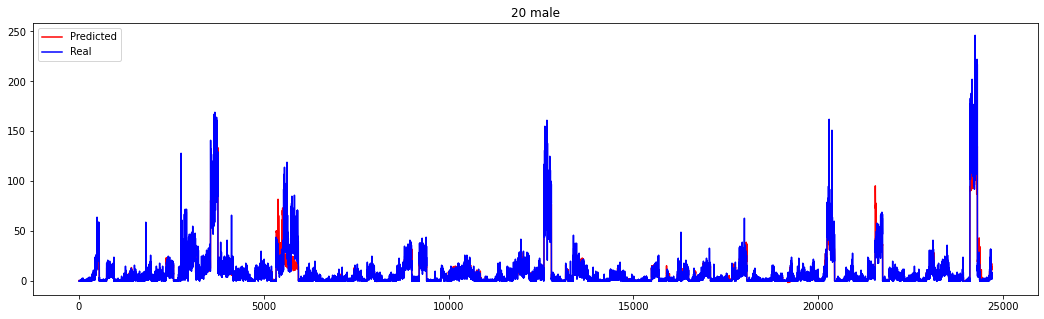

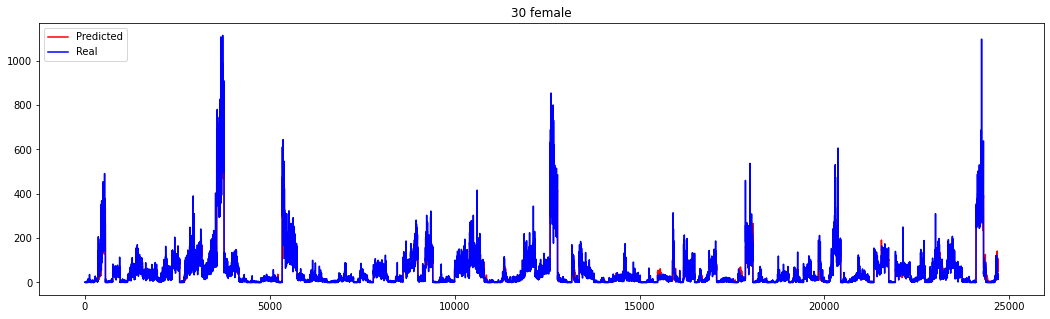

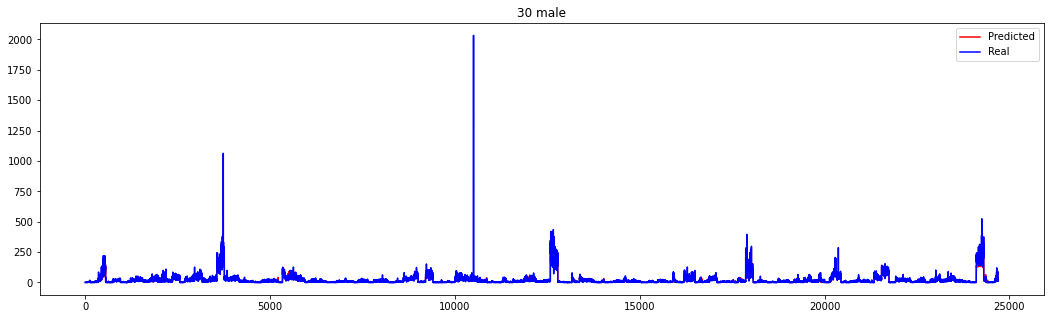

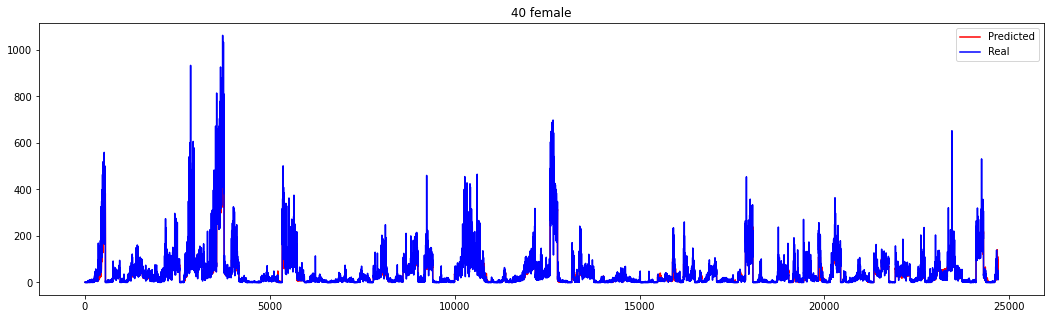

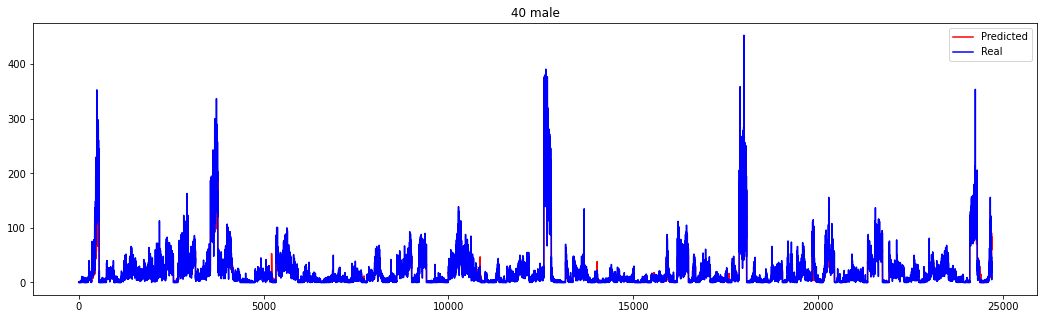

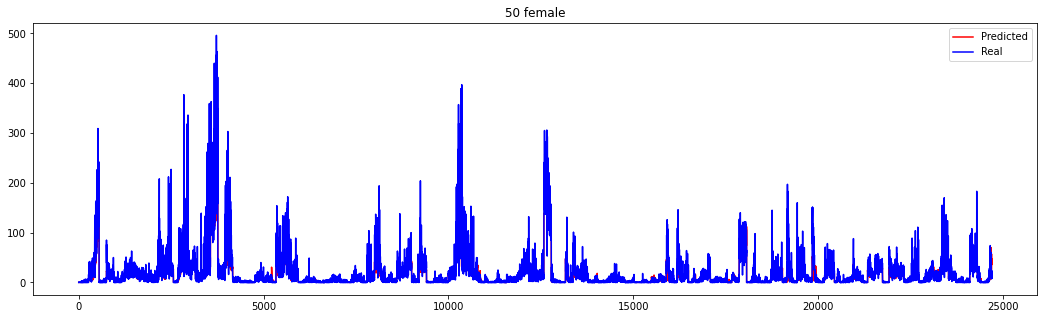

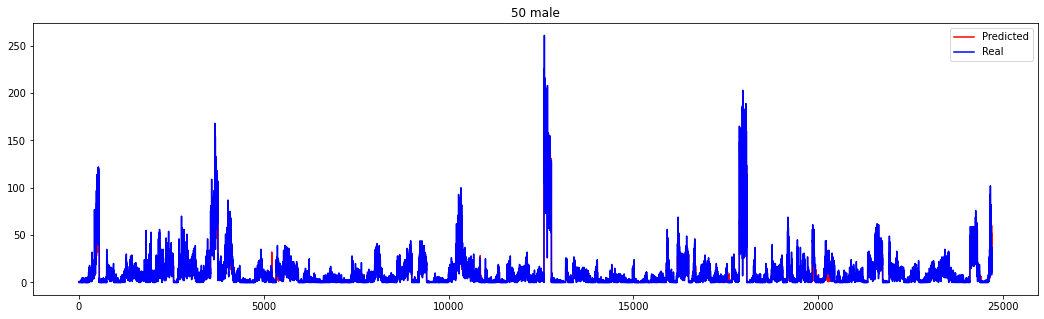

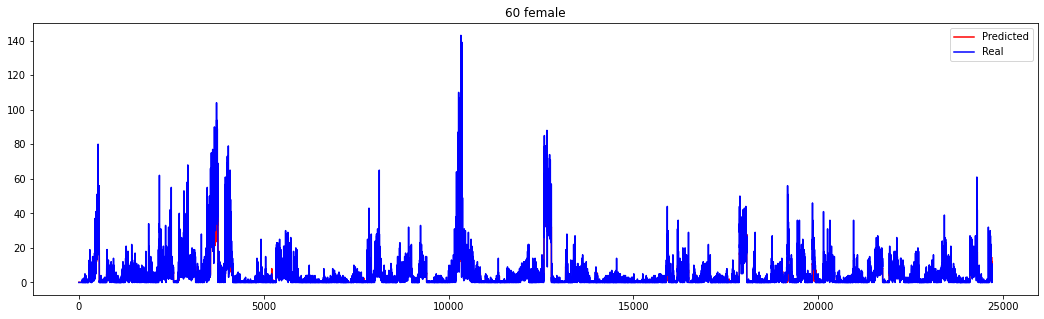

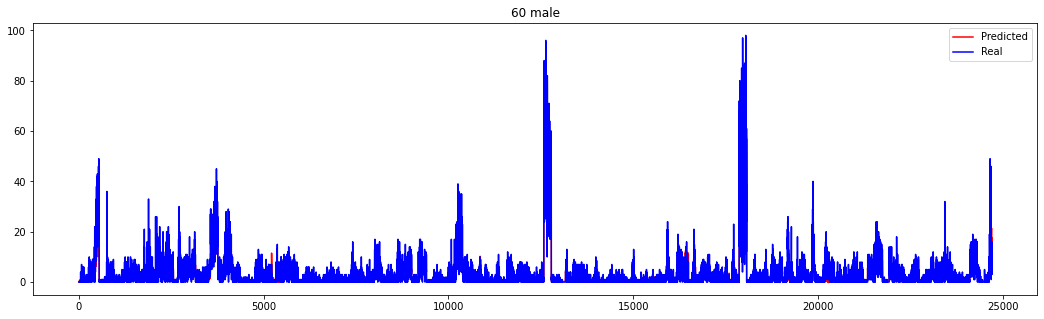

In [ ]:
age = ['20 female', '20 male',
       '30 female', '30 male',
       '40 female', '40 male',
       '50 female', '50 male',
       '60 female', '60 male',]

for index in range(10):  
  plt.figure(figsize=(18,5))
  plt.plot(pre_sale_total[:, index], color = 'red', label = 'Predicted') # 예측값 plot
  plt.plot(y_test[:, index], color = 'blue', label = 'Real') # 실제값 plot
  plt.legend()
  plt.title(age[index])
  plt.show()

In [ ]:
mse = mean_squared_error(pre_sale_total, y_test)
print('MSE:', mse)
print('RMSE:', np.sqrt(mse))

MSE: 414.3808583309859
RMSE: 20.356346880788458


In [ ]:
# 향후 앙상블을 위해 예측값 백업
pd.DataFrame(pre_sale_total, 
             columns=wea_sale_ohe.loc[:,'20대 여성 판매량(개)':'60대 남성 판매량(개)'].columns).to_csv('../data/predicted_sale_LSTM.csv', index=False)

#### (3) 모델 백업
- 데이터 전체를 학습하여 백업합니다.

In [ ]:
total.shape, train.shape, test.shape

((89934, 144), (62841, 144), (27093, 144))

In [ ]:
X = [] 
y = []

day = 20

# good_index는 상품의 인덱스를 의미합니다.
# 총 '126'개의 상품이 있습니다. 
for good_index in range(0, 126): 

  # 해당 인덱스의 상품에 대한 판매 데이터만 추출합니다.
  df = total[total[:, good_index]==1] 

  # 해당 판매 데이터를 day 기준으로 분할합니다.(20일)
  for i in range(day, df.shape[0]+1):
      X.append(df[i-day:i, :-10])
      y.append(df[i-1, -10:])

# numpy 배열로 변환합니다.
X, y = np.array(X), np.array(y)

# X_train의 shape을 재정의합니다. 
X = np.reshape(X, (X.shape[0], X.shape[1], -1))

In [ ]:
X.shape, y.shape, X_train.shape, y_train.shape, X_test.shape, y_test.shape

((87540, 20, 134),
 (87540, 10),
 (60447, 20, 134),
 (60447, 10),
 (24699, 20, 134),
 (24699, 10))

In [ ]:
with tf.device('/device:GPU:0'):

  regressor = Sequential()

  # 모델 정의
  regressor.add(LSTM(units = 100, return_sequences = True, 
                    input_shape = (X.shape[1], X.shape[2]))) 
  regressor.add(Dropout(0.4, seed = 1))
  regressor.add(LSTM(units = 100, return_sequences = True)) 
  regressor.add(Dropout(0.4, seed = 2))
  regressor.add(LSTM(units = 100, return_sequences = True))
  regressor.add(Dropout(0.4, seed = 3))
  regressor.add(LSTM(units = 100, return_sequences = True))
  regressor.add(Dropout(0.4, seed = 4))
  regressor.add(LSTM(units = 100))
  regressor.add(Dropout(0.4, seed = 5))
  regressor.add(Dense(units = 10))

  # 모델 compile
  regressor.compile(optimizer = 'adam', loss = 'mean_squared_error') 

  # 모델 fitting
  regressor.fit(X, y, epochs = 100, batch_size = 32)

Epoch 1/100
2736/2736 [==============================] - 37s 12ms/step - loss: 2149.7410
Epoch 2/100
2736/2736 [==============================] - 34s 12ms/step - loss: 2130.5952
Epoch 3/100
2736/2736 [==============================] - 34s 12ms/step - loss: 2127.8638
Epoch 4/100
2736/2736 [==============================] - 32s 12ms/step - loss: 2094.8103
Epoch 5/100
2736/2736 [==============================] - 34s 12ms/step - loss: 1286.8269
Epoch 6/100
2736/2736 [==============================] - 32s 12ms/step - loss: 975.7354
Epoch 7/100
2736/2736 [==============================] - 33s 12ms/step - loss: 819.8804
Epoch 8/100
2736/2736 [==============================] - 32s 12ms/step - loss: 744.8623
Epoch 9/100
2736/2736 [==============================] - 34s 12ms/step - loss: 681.3997
Epoch 10/100
2736/2736 [==============================] - 32s 12ms/step - loss: 669.5531
Epoch 11/100
2736/2736 [==============================] - 34s 12ms/step - loss: 635.1611
Epoch 12/100
2736/2736 [=

In [ ]:
regressor.save('/content/drive/MyDrive/final weather/data/lstm_sale.h5')

### 2) SNS 언급량 예측

#### (1) 데이터 전처리

In [ ]:
path = '../data/'
path = '/content/drive/MyDrive/final weather/data/'

wea_sns_ohe = pd.read_csv(path+'weather_sns_ohe.csv')

In [ ]:
# 상품 목록을 정의합니다. 
goods = wea_sns_ohe.loc[:,'소분류_가열식 가습기':'소분류_히터'].columns.tolist()

# 상품 및 날짜로 데이터를 정렬합니다.
wea_sns_ohe.sort_values(goods+['날짜'], inplace=True)

# 정렬로 뒤죽박죽이 된 행 인덱스를 초기화합니다. 
wea_sns_ohe.index = range(0, len(wea_sns_ohe))

In [ ]:
# 모델의 성능 향상을 위해 MinMaxScale을 진행합니다.

weather_sc = MinMaxScaler(feature_range = (0, 1)) 
weather_scaled = weather_sc.fit_transform(wea_sns_ohe.loc[:,'평균기온(°C)':'미세먼지(PM10)'].values)

# 반드시 언급량 데이터를 마지막 열에 두어야 합니다.
# scale된 데이터를 병합해서 total data를 생성합니다.
# 상품 소분류 원핫인코딩 열은 MinMaxScale을 진행하지 않았습니다. (0과 1로 이루어졌으므로)
total = np.hstack([wea_sns_ohe.loc[:,'소분류_가열식 가습기':'소분류_히터'].values,
                   weather_scaled,
                   wea_sns_ohe['SNS언급량'].values.reshape(-1,1)])

In [ ]:
# 가열식 가습기 판매 데이터 개수의 80% 입니다.
index =int(len(wea_sns_ohe[wea_sns_ohe['소분류_가열식 가습기']==1]) * 0.8)

# 가스온수기 판매 데이터의 80%를 train data로, 20%를 test data로 정의합니다.
train = total[wea_sns_ohe['소분류_가열식 가습기']==1][:index]
test = total[wea_sns_ohe['소분류_가열식 가습기']==1][index:]

# 전체 상품 목록 리스트
goods = wea_sns_ohe.loc[:,'소분류_가열식 가습기':'소분류_히터'].columns.tolist()

# 각 상품의 판매 데이터의 80%는 train, 20%는 test data에 추가합니다. 
for good in goods[1:]:
  index =int(len(wea_sns_ohe[wea_sns_ohe[good]==1]) * 0.8)
  train = np.vstack([train, total[wea_sns_ohe[good]==1][:index]])
  test = np.vstack([test, total[wea_sns_ohe[good]==1][index:]])

In [ ]:
total.shape, train.shape, test.shape

((91980, 135), (73584, 135), (18396, 135))

In [ ]:
X_train = [] 
y_train = []

day = 20

# good_index는 상품의 인덱스를 의미합니다.
# 총 '126'개의 상품이 있습니다. 
for good_index in range(0, 126): 

  # 해당 인덱스의 상품에 대한 판매 데이터만 추출합니다.
  df = train[train[:, good_index]==1] 

  # 해당 판매 데이터를 day 기준으로 분할합니다.(20일)
  for i in range(day, df.shape[0]+1):
      X_train.append(df[i-day:i, :-1])
      y_train.append(df[i-1, -1])

# numpy 배열로 변환합니다.
X_train, y_train = np.array(X_train), np.array(y_train)

# X_train의 shape을 재정의합니다. 
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], -1))

In [ ]:
# test 데이터도 위와 같이 생성합니다.

X_test = []
y_test = []

day = 20

for good_index in range(0, 126):
  df = test[test[:, good_index]==1]
  for i in range(day, df.shape[0]+1):
      X_test.append(df[i-day:i, :-1])
      y_test.append(df[i-1, -1])

X_test, y_test = np.array(X_test), np.array(y_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], -1))

#### (2) 학습 및 예측

In [ ]:
with tf.device('/device:GPU:0'):

  regressor = Sequential()

  # 모델 정의
  regressor.add(LSTM(units = 100, return_sequences = True, 
                    input_shape = (X_train.shape[1], X_train.shape[2]))) 
  regressor.add(Dropout(0.4, seed = 1))
  regressor.add(LSTM(units = 100, return_sequences = True)) 
  regressor.add(Dropout(0.4, seed = 2))
  regressor.add(LSTM(units = 100, return_sequences = True))
  regressor.add(Dropout(0.4, seed = 3))
  regressor.add(LSTM(units = 100, return_sequences = True))
  regressor.add(Dropout(0.4, seed = 4))
  regressor.add(LSTM(units = 100))
  regressor.add(Dropout(0.4, seed = 5))
  regressor.add(Dense(units = 1))

  # 모델 compile
  regressor.compile(optimizer = 'adam', loss = 'mean_squared_error') 

  # 모델 fitting
  regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

  # test data를 통한 예측
  pre_cnt_total = regressor.predict(X_test) 

Epoch 1/100
2225/2225 [==============================] - 31s 12ms/step - loss: 33565.1133
Epoch 2/100
2225/2225 [==============================] - 26s 11ms/step - loss: 32499.8379
Epoch 3/100
2225/2225 [==============================] - 24s 11ms/step - loss: 27406.8145
Epoch 4/100
2225/2225 [==============================] - 27s 12ms/step - loss: 23884.8711
Epoch 5/100
2225/2225 [==============================] - 25s 11ms/step - loss: 20646.3848
Epoch 6/100
2225/2225 [==============================] - 25s 11ms/step - loss: 19415.8086
Epoch 7/100
2225/2225 [==============================] - 26s 12ms/step - loss: 17731.1309
Epoch 8/100
2225/2225 [==============================] - 27s 12ms/step - loss: 15984.5156
Epoch 9/100
2225/2225 [==============================] - 25s 11ms/step - loss: 14777.3613
Epoch 10/100
2225/2225 [==============================] - 26s 12ms/step - loss: 13973.2363
Epoch 11/100
2225/2225 [==============================] - 26s 12ms/step - loss: 12580.0654
Epoch 12

In [ ]:
regressor.save('/content/drive/MyDrive/final weather/data/lstm_sns_80%.h5')

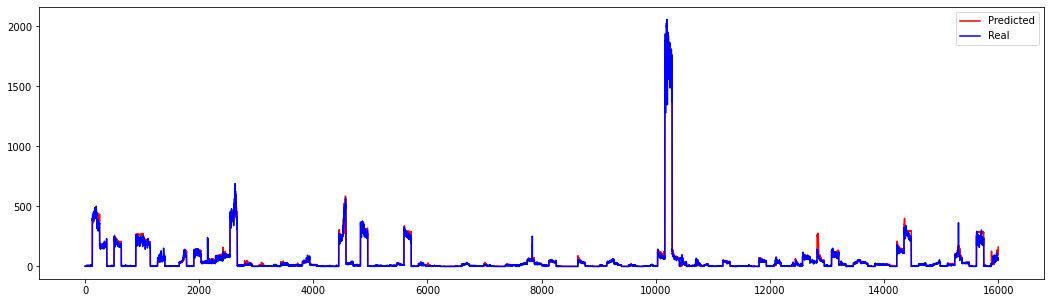

In [ ]:
plt.figure(figsize=(18,5))
plt.plot(pre_cnt_total, color = 'red', label = 'Predicted') # 예측값 plot
plt.plot(y_test, color = 'blue', label = 'Real') # 실제값 plot
plt.legend()
plt.show()

In [ ]:
mse = mean_squared_error(pre_cnt_total, y_test)
print('MSE:', mse)
print('RMSE:', np.sqrt(mse))

MSE: 472.26642709445053
RMSE: 21.731691767887067


In [ ]:
pd.DataFrame(pre_cnt_total, columns=['SNS언급량']).to_csv('../data/predicted_cnt_LSTM.csv', index=False)

#### (3) 모델 백업

In [ ]:
X = [] 
y = []

day = 20

# good_index는 상품의 인덱스를 의미합니다.
# 총 '126'개의 상품이 있습니다. 
for good_index in range(0, 126): 

  # 해당 인덱스의 상품에 대한 판매 데이터만 추출합니다.
  df = total[total[:, good_index]==1] 

  # 해당 판매 데이터를 day 기준으로 분할합니다.(20일)
  for i in range(day, df.shape[0]+1):
      X.append(df[i-day:i, :-1])
      y.append(df[i-1, -1])

# numpy 배열로 변환합니다.
X, y = np.array(X), np.array(y)

# X_train의 shape을 재정의합니다. 
X = np.reshape(X, (X.shape[0], X.shape[1], -1))

In [ ]:
X.shape, y.shape, X_train.shape, y_train.shape, X_test.shape, y_test.shape

((89586, 20, 134),
 (89586,),
 (61866, 20, 134),
 (61866,),
 (25326, 20, 134),
 (25326,))

In [ ]:
with tf.device('/device:GPU:0'):

  regressor_sns = Sequential()

  # 모델 정의
  regressor_sns.add(LSTM(units = 100, return_sequences = True, 
                    input_shape = (X.shape[1], X.shape[2]))) 
  regressor_sns.add(Dropout(0.4, seed = 1))
  regressor_sns.add(LSTM(units = 100, return_sequences = True)) 
  regressor_sns.add(Dropout(0.4, seed = 2))
  regressor_sns.add(LSTM(units = 100, return_sequences = True))
  regressor_sns.add(Dropout(0.4, seed = 3))
  regressor_sns.add(LSTM(units = 100, return_sequences = True))
  regressor_sns.add(Dropout(0.4, seed = 4))
  regressor_sns.add(LSTM(units = 100))
  regressor_sns.add(Dropout(0.4, seed = 5))
  regressor_sns.add(Dense(units = 1))

  # 모델 compile
  regressor_sns.compile(optimizer = 'adam', loss = 'mean_squared_error') 

  # 모델 fitting
  regressor_sns.fit(X, y, epochs = 100, batch_size = 32)

Epoch 1/100
2800/2800 [==============================] - 41s 12ms/step - loss: 31841.8789
Epoch 2/100
2800/2800 [==============================] - 35s 12ms/step - loss: 24710.7754
Epoch 3/100
2800/2800 [==============================] - 35s 12ms/step - loss: 20897.5332
Epoch 4/100
2800/2800 [==============================] - 36s 13ms/step - loss: 19034.2344
Epoch 5/100
2800/2800 [==============================] - 34s 12ms/step - loss: 17532.7402
Epoch 6/100
2800/2800 [==============================] - 36s 13ms/step - loss: 17193.7500
Epoch 7/100
2800/2800 [==============================] - 34s 12ms/step - loss: 15545.1436
Epoch 8/100
2800/2800 [==============================] - 36s 13ms/step - loss: 14272.4004
Epoch 9/100
2800/2800 [==============================] - 34s 12ms/step - loss: 13005.7305
Epoch 10/100
2800/2800 [==============================] - 35s 13ms/step - loss: 12124.3691
Epoch 11/100
2800/2800 [==============================] - 34s 12ms/step - loss: 9405.9326
Epoch 12/

In [ ]:
regressor_sns.save('/content/drive/MyDrive/final weather/data/lstm_sns.h5')